<a href="https://colab.research.google.com/github/Explorer9/INFO5731_FALL2020/blob/master/Copy_of_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
import pandas as pd
import json
file_name=[]
df=pd.DataFrame()
reviews=[]
ratings=[]
path='/content/test'
import os
for root, dirs, files in os.walk(path, topdown=False):
  for i in files:
    f=open('/content/test/'+i,)
    data=json.load(f)
    for j in data:
      ratings.append(j['stars'])
      reviews.append(j['text'])

In [ ]:
df=pd.DataFrame()
df['reviews']=reviews
df['ratings']=ratings

In [ ]:
!git clone "https://github.com/dongwookim-ml/python-topic-model.git"

In [ ]:
import sys
sys.path.insert(0, '/content/python-topic-model')


In [ ]:
import os
import logging

import numpy as np
import matplotlib.pyplot as plt

from ptm import GibbsSupervisedLDA
from ptm.nltk_corpus import get_ids_cnt
from ptm.utils import convert_cnt_to_list, get_top_words

%matplotlib inline  

logger = logging.getLogger('GibbsSupervisedLDA')
logger.propagate = False

In [ ]:
import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
voca, word_ids, word_cnt = get_ids_cnt(reviews)
corpus = convert_cnt_to_list(word_ids, word_cnt)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


num doc 2100 num_voca 7178


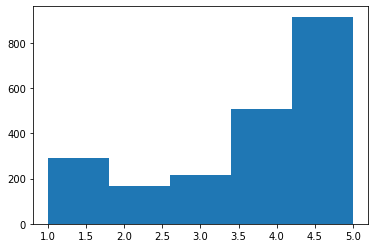

max rating 5.0 	min rating 1.0


2020-12-02 08:50:26 INFO:GibbsSupervisedLDA:[ITER] 0,	MAE:0.46,	log_likelihood:-845638.02
2020-12-02 08:50:31 INFO:GibbsSupervisedLDA:[ITER] 1,	MAE:0.09,	log_likelihood:-791233.89
2020-12-02 08:50:36 INFO:GibbsSupervisedLDA:[ITER] 2,	MAE:0.09,	log_likelihood:-778858.83
2020-12-02 08:50:40 INFO:GibbsSupervisedLDA:[ITER] 3,	MAE:0.09,	log_likelihood:-771919.02
2020-12-02 08:50:45 INFO:GibbsSupervisedLDA:[ITER] 4,	MAE:0.09,	log_likelihood:-767536.48
2020-12-02 08:50:50 INFO:GibbsSupervisedLDA:[ITER] 5,	MAE:0.09,	log_likelihood:-763727.27
2020-12-02 08:50:55 INFO:GibbsSupervisedLDA:[ITER] 6,	MAE:0.09,	log_likelihood:-761118.75
2020-12-02 08:50:59 INFO:GibbsSupervisedLDA:[ITER] 7,	MAE:0.09,	log_likelihood:-758957.02
2020-12-02 08:51:04 INFO:GibbsSupervisedLDA:[ITER] 8,	MAE:0.09,	log_likelihood:-757446.99
2020-12-02 08:51:09 INFO:GibbsSupervisedLDA:[ITER] 9,	MAE:0.09,	log_likelihood:-755512.60
2020-12-02 08:51:13 INFO:GibbsSupervisedLDA:[ITER] 10,	MAE:0.08,	log_likelihood:-754411.00
2020-12-0

In [ ]:
n_doc = len(corpus)
n_voca = voca.size
print('num doc', n_doc, 'num_voca', n_voca)
plt.hist(ratings, bins=5)
plt.show()
print('max rating', np.max(ratings), '\tmin rating', np.min(ratings))
n_topic = 20
r_var = 0.01

model = GibbsSupervisedLDA(n_doc, n_voca, n_topic, sigma=r_var)
model.fit(corpus, ratings)

In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=15)
    print('Eta', model.eta[ti] ,'Topic', ti ,':\t', ','.join(top_words))

Eta -9.648747873657326 Topic 6 :	 like,could,better,much,well,want,know,bad,money,terrible,may,maybe,one,think,nice
Eta -8.84515312856964 Topic 10 :	 would,back,order,said,bad,going,pretty,go,three,came,first,restaurant,dinner,say,also
Eta -6.23943826918899 Topic 19 :	 little,see,parking,open,inside,like,nothing,people,getting,though,wait,dining,finally,list,giving
Eta -3.6967637326122604 Topic 5 :	 time,one,went,first,like,really,told,check,actually,try,nothing,working,see,around,finally
Eta -3.4095782618190533 Topic 13 :	 us,would,never,could,another,said,get,came,got,back,made,took,manager,table,later
Eta -2.9232349569351035 Topic 1 :	 one,however,even,every,main,airport,nothing,counter,white,store,trip,far,line,major,mess
Eta -1.5821067761173904 Topic 7 :	 chicken,get,rice,hot,better,got,meat,cook,either,water,sandwich,way,indian,beef,enough
Eta 0.004157330046476587 Topic 8 :	 cheese,ordered,sauce,also,soup,like,french,chicken,decent,much,well,quality,maybe,bland,taste
Eta 0.563983

Question 1:
1.Try this amazing restaurent which serves which serves delicious salads
2.Every  

In [ ]:
import logging
from ptm.nltk_corpus import get_reuters_token_list_by_sentence
from ptm import HMM_LDA
from ptm.utils import get_top_words

logger = logging.getLogger('HMM_LDA')
logger.propagate=False

In [ ]:
corpus=[corpus]

In [ ]:
n_docs = len(corpus)
n_voca = len(voca)
n_topic = 50
n_class = 20
max_iter = 100
alpha = 0.1
beta = 0.01
gamma = 0.1
eta = 0.1
model = HMM_LDA(n_docs, n_voca, n_topic, n_class, alpha=alpha, beta=beta, gamma=gamma, eta=eta, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [ ]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  gently,small,times,big,tell,water,give,everything,tartar,alcohol
Topic 1 :  one,crazy,plate,hair,least,plated,tonight,ice,rip,cityscape
Topic 2 :  matter,give,confused,kids,holiday,around,cam,help,already,eating
Topic 3 :  paper,weird,complexity,courteous,hot,broken,convention,meaty,medical,garden
Topic 4 :  one,paint,within,deal,car,butter,dinner,side,last,combination
Topic 5 :  fair,know,laugh,sure,since,chip,environment,prime,bit,times
Topic 6 :  concourse,want,visit,brunch,favorite,chef,loud,number,forgotten,room
Topic 7 :  help,amount,hot,meat,included,stuff,mad,incredibly,end,saturday
Topic 8 :  ran,maintenance,point,venetian,less,fantastic,trying,gave,expect,regardless
Topic 9 :  one,eating,sit,times,ended,outside,shelf,truly,general,everything
Topic 10 :  morning,cheese,delivery,due,male,tables,breakfast,lucky,every,meatless
Topic 11 :  one,help,scratch,dollar,plan,mine,fun,water,selection,busy
Topic 12 :  though,super,rotation,part,number,help,create,done,mention,ma

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
df.loc[df['ratings']==5.0, 'sentiment'] = 'very_positve'
df.loc[df['ratings']==4.0, 'sentiment'] = 'Positve'
df.loc[df['ratings']==3.0, 'sentiment'] = 'Neutral'
df.loc[df['ratings']==2.0, 'sentiment'] = 'Negative'
df.loc[df['ratings']==1.0, 'sentiment'] = 'very_Negative'


In [ ]:
df=df.dropna()

In [ ]:
X = df.iloc[:, 0].values
y = df.iloc[:, 2].values
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy using Multinomial navie bayes: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using Multinomial navie bayes:  0.4222222222222222

Classification Report

                precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        47
      Neutral       0.00      0.00      0.00        74
      Positve       0.33      0.01      0.01       157
very_Negative       0.00      0.00      0.00        87
 very_positve       0.42      1.00      0.59       265

     accuracy                           0.42       630
    macro avg       0.15      0.20      0.12       630
 weighted avg       0.26      0.42      0.25       630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import LinearSVC
svm_classifier=LinearSVC()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
classification_report=classification_report(y_test,y_pred)
print('\n Accuracy using support vector machine: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using support vector machine:  0.5746031746031746

Classification Report

                precision    recall  f1-score   support

     Negative       0.39      0.15      0.22        47
      Neutral       0.38      0.16      0.23        74
      Positve       0.43      0.40      0.41       157
very_Negative       0.72      0.71      0.72        87
 very_positve       0.63      0.82      0.71       265

     accuracy                           0.57       630
    macro avg       0.51      0.45      0.46       630
 weighted avg       0.54      0.57      0.54       630



# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
train=pd.read_csv('/content/train.csv')
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_missing = train.isna()
train_num_missing = train_missing.sum()

In [ ]:
miss=train_num_missing/len(train)
miss=miss.sort_values()
miss.tail(10)

GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
GarageCond      0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [ ]:
train.drop(['FireplaceQu','Fence','Alley','MiscFeature','PoolQC','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
X=train.drop(['SalePrice'],axis=1)
Y=train['SalePrice']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: ignored